# Car Purchase Prediction using Grid Search

**Scenario**: Your general manager hands you a list of ages and salaries for your company's customers that have purchased an SUV of a particular brand.

**Goal**: What is the likelihood of a future customer of a particular age and salary purchasing this SUV? This information will be used to design a marketing campaign on social media targeted towards this ideal customer.

**Results**: 

We revisit the car purchase prediction analysis performed using the kernel SVM model with k-fold cross validation and introduce grid search.

Recall the kernel SVM model had a 93% accuracy score but this was based on a single training set. With k=10 folds, the kernel SVM model with cross validation produced an accuracy score of 90.33% with a standard deviation of 6.57%.

With grid search, the best parameters for the kernel SVM model were found to be:
- `C`: 1
- `gamma`: 0.7
- `kernel`: rbf

This slightly increased the accuracy score to 90.67% with a standard deviation of 6.80%.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Applying grid search

We apply grid search to find the best model and the best parameters.

To [prevent data leakage](https://towardsdatascience.com/pre-process-data-with-pipeline-to-prevent-data-leakage-during-cross-validation-e3442cca7fdc) if we fit the GridSearchCV with a preprocessed training set, we instantiate the pipeline instead of scaling the features.

In [3]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Instantiating the pipeline
pipe = Pipeline([
    ("sc", StandardScaler()),
    ("svc", SVC())
    ])

# Applying Grid Search to find best parameters
parameters = [{'svc__C': [0.25, 0.5, 0.75, 1], 'svc__kernel': ['linear']},
              {'svc__C': [0.25, 0.5, 0.75, 1], 'svc__kernel': ['rbf'], 'svc__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'svc__random_state': [0]}]
grid_search = GridSearchCV(estimator = pipe,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f"Best Accuracy: {best_accuracy*100:.2f}")
print("Best Parameters:", best_parameters)

Best Accuracy: 91.00
Best Parameters: {'svc__C': 1, 'svc__gamma': 0.7, 'svc__kernel': 'rbf', 'svc__random_state': 0}


## Resplitting the dataset

We split the original dataset again to reinitialize the Training set and Test set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature scaling

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model

Using the best parameters found using grid search, the kernel SVM model is trained on the Training set.

In [6]:
classifier = SVC(C=1, gamma=0.7, kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.7, random_state=0)

## Making the confusion matrix

In [7]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Applying k-Fold Cross Validation

In [8]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f"Accuracy: {accuracies.mean()*100:.2f}")
print(f"Standard Deviation: {accuracies.std()*100:.2f}")

Accuracy: 90.67
Standard Deviation: 6.80


## Visualizing the Training set results

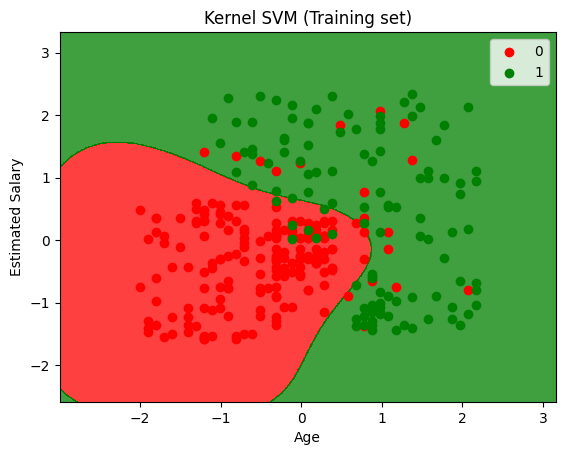

In [9]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

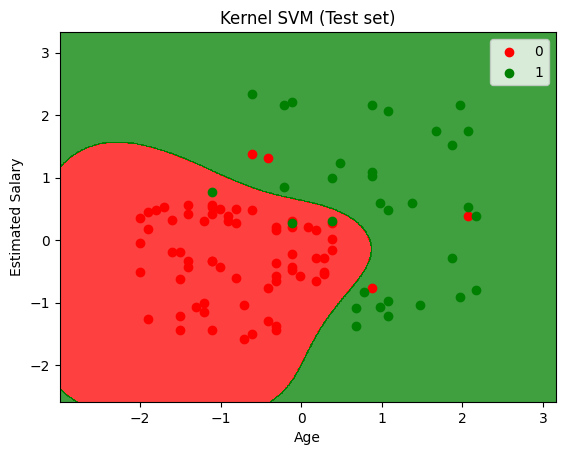

In [10]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()